In [120]:
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import pandas as pd

In [121]:
def evaluation_matrix(X, Y,pred):
    print(f'homogeneity score: {metrics.homogeneity_score(Y, pred)}')
    print(f'completeness score: {metrics.completeness_score(Y, pred)}')
    print(f'v measure score: {metrics.v_measure_score(Y, pred)}')
    print(f'adjusted rand score: {metrics.adjusted_rand_score(Y, pred)}')
    print(f'silhouette score: {metrics.silhouette_score(X, pred)}')

# 1. First simulated data set

## Original data

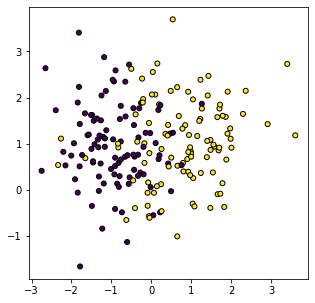

In [122]:
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
plt.figure(figsize=(5, 5))
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')

## 1.1Kmeans

homogeneity score: 0.3309833354415221
completeness score: 0.3350556302104048
v measure score: 0.33300703341568877
adjusted rand score: 0.40666811159557875
silhouette score: 0.3984483059131779


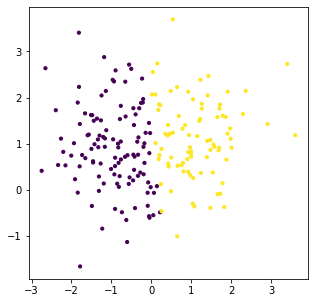

In [123]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=1)
km.fit(X1)
plt.figure(figsize=(5, 5))
plt.scatter(X1[:, 0], X1[:, 1], s=10, c=km.labels_)
evaluation_matrix(X1, Y1, km.labels_)

## 1.2 Hierarchical clustering

ward :
homogeneity score: 0.28008511980948086
completeness score: 0.2945967571325951
v measure score: 0.28715771743497703
adjusted rand score: 0.3217176902761897
silhouette score: 0.387849617221883
average :
homogeneity score: 0.014947250671181257
completeness score: 0.13301956194269657
v measure score: 0.026874630890599147
adjusted rand score: 8.958276960786605e-06
silhouette score: 0.43574161595054106
complete :
homogeneity score: 0.2912054235738975
completeness score: 0.3165208023302529
v measure score: 0.30333584559527793
adjusted rand score: 0.3105053191959235
silhouette score: 0.3483630219256989


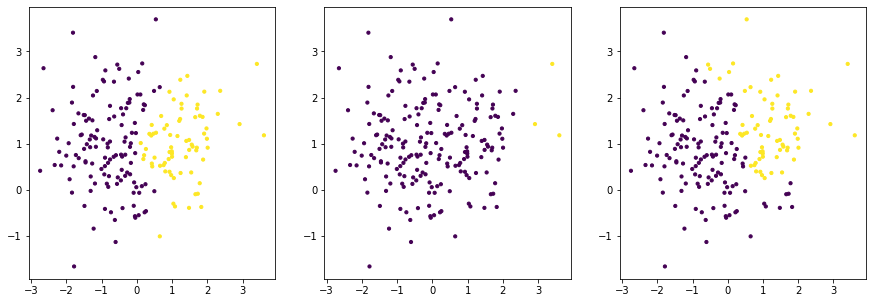

In [124]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
for i, linkage in enumerate(('ward', 'average', 'complete')):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=2)
    clustering.fit(X1)
    ax[i].scatter(X1[:, 0], X1[:, 1], s=10, c=clustering.labels_)
    print(linkage, ':')
    evaluation_matrix(X1, Y1, clustering.labels_)

## 1.3 Spectral clustering

homogeneity score: 0.3116864787750041
completeness score: 0.3265432644041136
v measure score: 0.31894195260420266
adjusted rand score: 0.3569669195933482
silhouette score: 0.39589772108825855


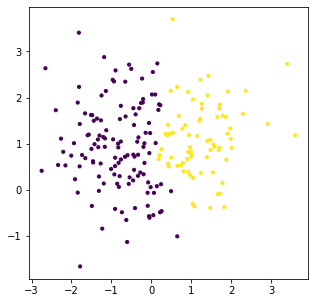

In [125]:
spectral = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors")
spectral.fit(X1)
plt.figure(figsize=(5, 5))
plt.scatter(X1[:, 0], X1[:, 1], s=10, c=spectral.labels_)
evaluation_matrix(X1, Y1, spectral.labels_)

# 2. Second simulated data set

## Original data

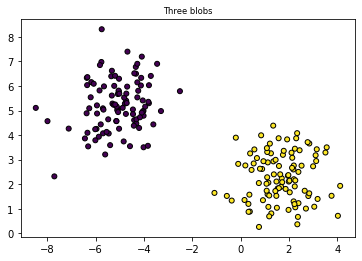

In [126]:
plt.title("Three blobs", fontsize='small')
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')

## 2.1 Kmeans

homogeneity score: 1.0
completeness score: 1.0
v measure score: 1.0
adjusted rand score: 1.0
silhouette score: 0.7600194499576388


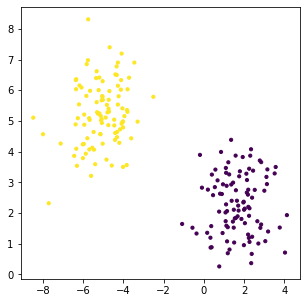

In [127]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=1)
km.fit(X2)
plt.figure(figsize=(5, 5))
plt.scatter(X2[:, 0], X2[:, 1], s=10, c=km.labels_)
evaluation_matrix(X2, Y2, km.labels_)

## 2.2 Hierarchical clustering

ward :
homogeneity score: 1.0
completeness score: 1.0
v measure score: 1.0
adjusted rand score: 1.0
silhouette score: 0.7600194499576388
average :
homogeneity score: 1.0
completeness score: 1.0
v measure score: 1.0
adjusted rand score: 1.0
silhouette score: 0.7600194499576388
complete :
homogeneity score: 1.0
completeness score: 1.0
v measure score: 1.0
adjusted rand score: 1.0
silhouette score: 0.7600194499576388


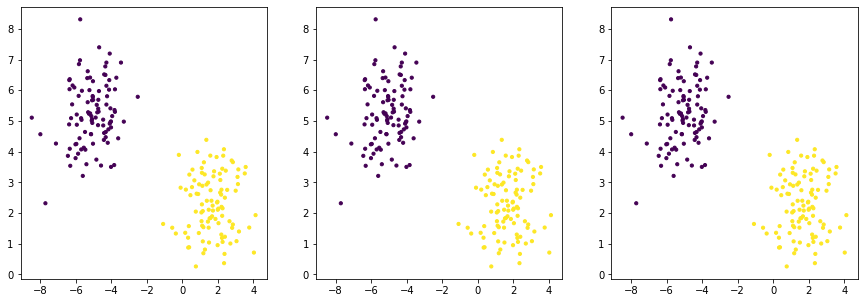

In [128]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
for i, linkage in enumerate(('ward', 'average', 'complete')):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=2)
    clustering.fit(X2)
    ax[i].scatter(X2[:, 0], X2[:, 1], s=10, c=clustering.labels_)
    print(linkage, ':')
    evaluation_matrix(X2, Y2, clustering.labels_)

## 2.3 Spectral clustering

homogeneity score: 1.0
completeness score: 1.0
v measure score: 1.0
adjusted rand score: 1.0
silhouette score: 0.7600194499576388


/home/yunfei/anaconda3/envs/sorbonne/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


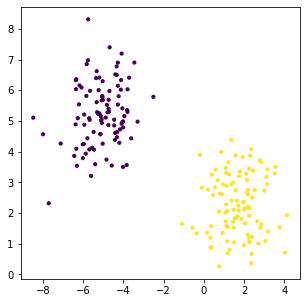

In [129]:
spectral = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors")
spectral.fit(X2)
plt.figure(figsize=(5, 5))
plt.scatter(X2[:, 0], X2[:, 1], s=10, c=spectral.labels_)
evaluation_matrix(X2, Y2, spectral.labels_)

# 3. Third simulated data set

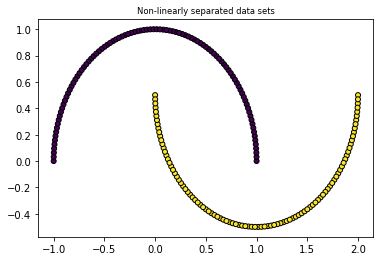

In [130]:
plt.title("Non-linearly separated data sets", fontsize='small')
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=25, edgecolor='k')

## 3.1 Kmeans

homogeneity score: 0.0002943290510649666
completeness score: 0.00029856417275520556
v measure score: 0.00029643148586798397
adjusted rand score: -0.004549044640025533
silhouette score: -0.0017593398863824672


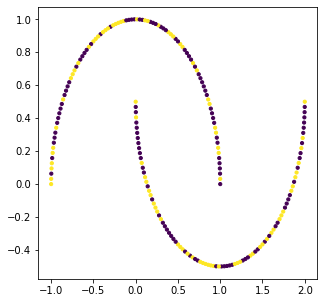

In [131]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=1)
km.fit(X1)
plt.figure(figsize=(5, 5))
plt.scatter(X3[:, 0], X3[:, 1], s=10, c=km.labels_)
evaluation_matrix(X3, Y3, km.labels_)

## 3.2 Hierarchical clustering

ward :
homogeneity score: 0.49342260576014585
completeness score: 0.5282512370705066
v measure score: 0.5102432713148244
adjusted rand score: 0.4876571255489929
silhouette score: 0.4418858667981908
average :
homogeneity score: 0.36926701135176515
completeness score: 0.4282972861387335
v measure score: 0.396597639388205
adjusted rand score: 0.32212343119985426
silhouette score: 0.43999948395558464
complete :
homogeneity score: 0.3273869488861127
completeness score: 0.3308317272249125
v measure score: 0.32910032395561384
adjusted rand score: 0.4066613337211839
silhouette score: 0.4751813818099613


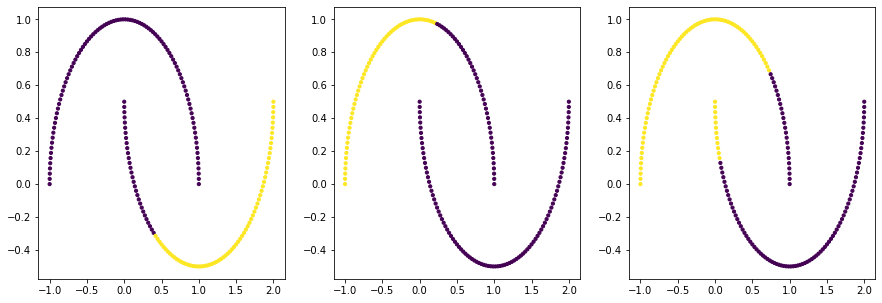

In [132]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
for i, linkage in enumerate(('ward', 'average', 'complete')):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=2)
    clustering.fit(X3)
    ax[i].scatter(X3[:, 0], X3[:, 1], s=10, c=clustering.labels_)
    print(linkage, ':')
    evaluation_matrix(X3, Y3, clustering.labels_)

## 3.3 Spectral clustering

homogeneity score: 1.0
completeness score: 1.0
v measure score: 1.0
adjusted rand score: 1.0
silhouette score: 0.32831603288410605


/home/yunfei/anaconda3/envs/sorbonne/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


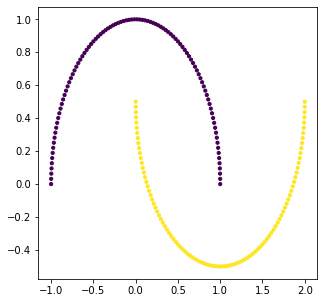

In [133]:
spectral = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors")
spectral.fit(X3)
plt.figure(figsize=(5, 5))
plt.scatter(X3[:, 0], X3[:, 1], s=10, c=spectral.labels_)
evaluation_matrix(X3, Y3, spectral.labels_)

# What is an optimal clustering method for each simulated data set?

## we will analyse the results of these three clustering methods visually and quatitatively.
## Dataset Analyse

**make_classification** specialises in introducing noise by way of: correlated, redundant and uninformative features; multiple Gaussian clusters per class; and linear transformations of the feature space. There are more overleaping between classes and this makes it harder for clustering task.

**make_blobs** provides greater control regarding the centers and standard deviations of each cluster, and is used to demonstrate clustering. There are less overlapping betweem samples from different classes.

**make_moons** provides non linear separable data.

## Evaluation matrics

### Homogeneity metrics:
A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

### Completeness metrics:
A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.

### V-measure metrics:
The V-measure is the harmonic mean between homogeneity and completeness

v = (1 + beta) * homogeneity * completeness
     / (beta * homogeneity + completeness)

### Adjusted Rand-Index metrics
The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

### Silhouette Coefficient metrics
The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. 

The Silhouette Coefficient for a sample is (b - a) / max(a, b)

## Conclusion
1. In **make_classification** dataset, these three methods have similarly performance and there all have trouble to cluster the overlapping samples. While, Hierarchical clustering and Kemans slightly better result with linkage criterion. The results may dependant on the dataset we generated, each time they have different results.

2. In **make_blobs** dataset all have very good results.

3. In **make_moons** dataset, as it is not easily clustered by only mesuring the distance of samples, spectral clustering outperforms other two methods, the low silhouette score is due to the features of dataset.

# 4. Breast cancer dataset

In [106]:
data_breast_cancer = pd.read_table('BreastDiagnostic.txt',sep=',',header=None)
breast_cancer_X = data_breast_cancer.iloc[:, 2:].to_numpy()
breast_cancer_y = data_breast_cancer.iloc[:, 1].to_numpy()

## 4.1 Kmeans

In [119]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=1)
km.fit(breast_cancer_X)
evaluation_matrix(breast_cancer_X, breast_cancer_y, km.labels_)

homogeneity score: 0.42229071246999117
completeness score: 0.5168089972809706
v measure score: 0.46479332792160793
adjusted rand score: 0.49142453622455523
silhouette score: 0.6972646156059465


## 4.2 Hierarchical clustering

In [135]:
for i, linkage in enumerate(('ward', 'average', 'complete')):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=2)
    clustering.fit(breast_cancer_X)
    ax[i].scatter(breast_cancer_X[:, 0], breast_cancer_X[:, 1], s=10, c=clustering.labels_)
    print(linkage, ':')
    evaluation_matrix(breast_cancer_X, breast_cancer_y, clustering.labels_)

ward :
homogeneity score: 0.26215041159208424
completeness score: 0.40760091453790204
v measure score: 0.31908185424236946
adjusted rand score: 0.2872456066095377
silhouette score: 0.6899796318793474
average :
homogeneity score: 0.054201915474557785
completeness score: 0.23513894555129045
v measure score: 0.08809665670006504
adjusted rand score: 0.05230450912720369
silhouette score: 0.6909351427174759
complete :
homogeneity score: 0.054201915474557785
completeness score: 0.23513894555129045
v measure score: 0.08809665670006504
adjusted rand score: 0.05230450912720369
silhouette score: 0.6909351427174759


## 4.3 Spectral clustering

In [136]:
spectral = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors")
spectral.fit(breast_cancer_X)
evaluation_matrix(breast_cancer_X, breast_cancer_y, spectral.labels_)

homogeneity score: 0.4270391930556219
completeness score: 0.40768587547970936
v measure score: 0.4171381784196669
adjusted rand score: 0.4194955229090943
silhouette score: 0.4064674289315106


# 5. Mice data sets

In [236]:
data_mice = pd.read_excel('Data_Cortex_Nuclear.xls', index_col=0)

In [237]:
data_mice['class'].value_counts(normalize=True)

c-CS-m    0.138889
c-SC-m    0.138889
c-CS-s    0.125000
c-SC-s    0.125000
t-CS-m    0.125000
t-SC-m    0.125000
t-SC-s    0.125000
t-CS-s    0.097222
Name: class, dtype: float64

In [238]:
data_mice.shape

(1080, 81)

### Remove incomplete data samples

In [239]:
data_mice.dropna(how='any', axis=0, inplace=True)

In [240]:
data_mice.shape

(552, 81)

### Use onehot embedding for features with string values

In [241]:
data_mice_y = data_mice.iloc[1:, -1].to_numpy()
data_mice = data_mice.iloc[1:, 1:-1]

In [243]:
data_mice = pd.concat([data_mice, pd.get_dummies(data_mice['Genotype'], prefix='Genotype')],axis=1)
data_mice.drop(['Genotype'],axis=1, inplace=True)
data_mice = pd.concat([data_mice, pd.get_dummies(data_mice['Treatment'], prefix='Treatment')],axis=1)
data_mice.drop(['Treatment'],axis=1, inplace=True)
data_mice = pd.concat([data_mice, pd.get_dummies(data_mice['Behavior'], prefix='Behavior')],axis=1)
data_mice.drop(['Behavior'],axis=1, inplace=True)

In [245]:
data_mice_X = data_mice.to_numpy()

## 5.1 Kmeans

In [248]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=1)
km.fit(data_mice_X)
evaluation_matrix(data_mice_X, data_mice_y, km.labels_)

homogeneity score: 0.06916349454265101
completeness score: 0.21166344477168067
v measure score: 0.10425911091783742
adjusted rand score: 0.05912036963816289
silhouette score: 0.23547420654398973


## 5.2 Hierarchical clustering

In [249]:
for i, linkage in enumerate(('ward', 'average', 'complete')):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=2)
    clustering.fit(data_mice_X)
    ax[i].scatter(data_mice_X[:, 0], data_mice_X[:, 1], s=10, c=clustering.labels_)
    print(linkage, ':')
    evaluation_matrix(data_mice_X, data_mice_y, clustering.labels_)

ward :
homogeneity score: 0.19351907356326975
completeness score: 0.5922331427913408
v measure score: 0.29171641324323305
adjusted rand score: 0.13930452364991866
silhouette score: 0.21400053000024097
average :
homogeneity score: 0.0017612105856834842
completeness score: 0.2735716834994671
v measure score: 0.0034998894449095822
adjusted rand score: -5.592999801448507e-05
silhouette score: 0.4917719697009373
complete :
homogeneity score: 0.02293477174785292
completeness score: 0.07845442982262525
v measure score: 0.035493611010223663
adjusted rand score: 0.01451354644216459
silhouette score: 0.1750966465953649


## 5.3 Spectral clustering

In [250]:
spectral = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors")
spectral.fit(data_mice_X)
evaluation_matrix(data_mice_X, data_mice_y, spectral.labels_)

homogeneity score: 0.27015501271766323
completeness score: 0.9999999999999996
v measure score: 0.425389043089522
adjusted rand score: 0.15892997904640374
silhouette score: 0.10307921757669944


 # Conclusion
 With this high dimension, we need more powerful methods like PCA to visualise the results.
 
 From quantitative results, I found that spectral clustering performers relatively better, as it has relatively higher scores for matrics.